In [1]:
import os
#Open the H5 file in read mode
path = 'data/text_file/'
file = os.listdir(path)
file

['2024.07.29.09h46m45s_process.h5.txt',
 '2024.07.29.10h10m45s_process.h5.txt',
 '2024.07.29.10h34m45s_process.h5.txt',
 '2024.07.29.10h58m45s_process.h5.txt',
 '2024.07.29.11h22m45s_process.h5.txt',
 '2024.07.29.11h46m45s_process.h5.txt']

In [2]:
import pandas as pd
dfs = []
for f in file:
    dfs.append(pd.read_csv(path+f, sep='\t', encoding_errors='ignore'))
    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(37994, 402)


,time,(2 Th),(3 Th),(4 Th),(5 Th),(6 Th),(7 Th),(8 Th),(9 Th),(10 Th),...,RG monitor [V],RG current limit flag,RB target [V],RB monitor [V],RB current limit flag,5CHV Board A temp monitor [C],update time [s],total SDO read errors,failed HTTP GET count,Unnamed: 401
0,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.219,0,700,700.75,0,31.12,0.125,0,0,NaN
1,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
2,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
3,2024-07-29 09:46:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
4,2024-07-29 09:46:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN


In [3]:
# preprocessing as done in p1
df = df.iloc[:,:315]

df['time'] = df['time'].apply(lambda x : x.split(' ')[1]) # index is set to time [s]
df = df.groupby('time')[df.columns[1:]].mean().reset_index()
df = df.drop(columns=['time'])

df.index.name = 'time'
df.columns = range(2, 316) # (2 Th) -> 2
df.head()

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# add a column for total intensity at each time step
df['sum'] = df.sum(axis=1)

# save the original one in case
df_original = df.copy()

In [5]:
# in terms of percentage [%]
for i in range(len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i] / df['sum'] * 100
df.head()

,2,3,4,5,6,7,8,9,10,11,...,307,308,309,310,311,312,313,314,315,sum
time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [6]:
# drop the sum column
df = df.drop(columns=['sum'])
df.head()

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


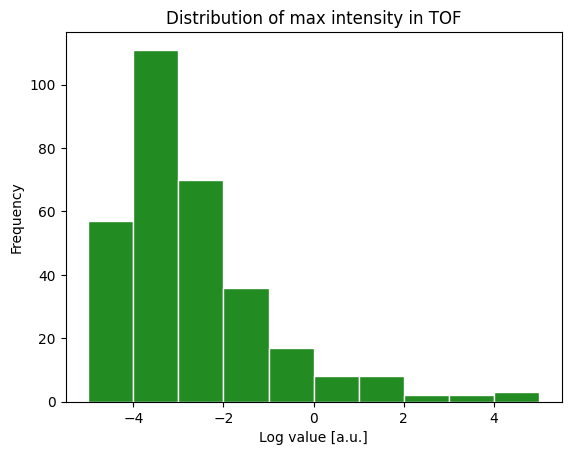

In [79]:
# find max values in respective columns
max_val = []
for i in range(len(df.columns)):
    max_val.append(df.iloc[:,i].max())
df_max = pd.DataFrame({'raw':max_val}, index=range(2,316)) # (2 Th) -> 2

import matplotlib.pyplot as plt
import numpy as np

plt.hist(np.log(df_max['raw']), edgecolor='w', bins=np.arange(-5,6,1), color='forestgreen')
# plt.xticks(np.arange(-5,6,1))
plt.xlabel('Log value [a.u.]')
plt.ylabel('Frequency')
plt.title('Distribution of max intensity in TOF')
plt.show()

In [19]:
print()

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [36]:
# add log column
df_max['log'] = df_max['raw'].apply(lambda x:np.log(x))

# add category labels
df_max.loc[:,'category'] = pd.cut(df_max['log'], bins=[-float('inf')] + np.arange(-4,0,1).tolist() + np.arange(1,5,1).tolist() + [float('inf')], 
                                  labels=np.arange(-4,5,1).tolist(), right=False)
df_max

C:\Users\shiny\AppData\Local\Temp\ipykernel_17144\2396613781.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-3, -3, -3, -1, -3, ..., -4, -4, -4, -4, -3]
Length: 314
Categories (9, int64): [-4 < -3 < -2 < -1 ... 1 < 2 < 3 < 4]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_max.loc[:,'category'] = pd.cut(df_max['log'], bins=[-float('inf')] + np.arange(-4,0,1).tolist() + np.arange(1,5,1).tolist() + [float('inf')],


,raw,log,category
2,0.035046,-3.351100,-3
3,0.041370,-3.185201,-3
4,0.042511,-3.157992,-3
5,0.283049,-1.262134,-1
6,0.022066,-3.813697,-3
...,...,...,...
311,0.016564,-4.100545,-4
312,0.013318,-4.318639,-4
313,0.017128,-4.067036,-4
314,0.008570,-4.759451,-4


In [37]:
print(df_max['log'].min(), df_max['log'].max())

-4.870622402946362 4.577910212499602


In [38]:
df_max['category'].unique()

[-3, -1, -2, 0, 3, 4, 1, 2, -4]
Categories (9, int64): [-4 < -3 < -2 < -1 ... 1 < 2 < 3 < 4]

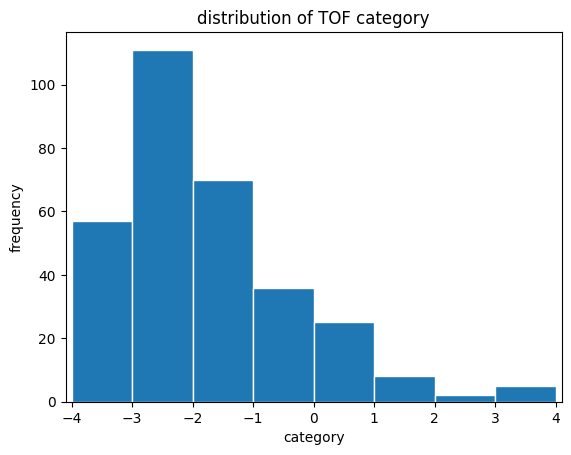

In [39]:
plt.hist(df_max['category'], edgecolor='w', bins=np.arange(-5,5,1))
# plt.xticks(np.arange(-10,1,1))
plt.xlabel('category')
plt.xlim(-4.1,4.1)
plt.ylabel('frequency')
plt.title('distribution of TOF category')
plt.show()

In [40]:
# sort mol mass by category
df_max.index.name = 'mass'
df_max = df_max.sort_values(by='category', ascending=False)
df_max

,raw,log,category
mass,,,
40,97.310823,4.577910,4
28,61.992279,4.127010,4
18,74.198804,4.306748,4
16,26.619794,3.281655,3
17,40.976641,3.713002,3
...,...,...,...
280,0.016338,-4.114263,-4
208,0.014035,-4.266235,-4
282,0.015140,-4.190438,-4


In [143]:
np.log(df_max[df_max.index==269]['raw'])

269   -3.493316
Name: raw, dtype: float64

In [41]:
category_mass = [] # Ar shows the highest value
for i in np.arange(4,-5,-1):
    category_mass.append(list(df_max[df_max['category']==i].index))
print(len(category_mass))
category_mass[:6]

9


[[40, 28, 18],
 [16, 17],
 [98, 63],
 [100, 135, 133, 65, 36, 32, 30, 85],
 [15,
  43,
  37,
  38,
  39,
  64,
  41,
  42,
  44,
  116,
  102,
  47,
  101,
  99,
  14,
  82,
  35,
  114,
  21,
  20,
  29,
  27,
  137,
  19,
  170],
 [67,
  69,
  78,
  79,
  80,
  81,
  168,
  86,
  87,
  117,
  95,
  115,
  172,
  139,
  104,
  136,
  134,
  5,
  120,
  118,
  66,
  167,
  34,
  24,
  9,
  33,
  45,
  31,
  46,
  48,
  49,
  50,
  13,
  26,
  23,
  22]]

In [42]:
n_elem = []
for i in category_mass:
    n_elem.append(len(i))
n_elem 

[3, 2, 2, 8, 25, 36, 70, 111, 57]

In [80]:
# generate random colors
import random

number_of_colors = len(category_mass)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

cate_colors = []
flag = 0
for i in category_mass:
    for j in range(len(i)):
        cate_colors.append(color[flag])
    flag += 1

['#52A9E9', '#5A4E3E', '#92E66F', '#C78482', '#B9384C', '#019A29', '#89FF76', '#ED5A07', '#63C6F2']


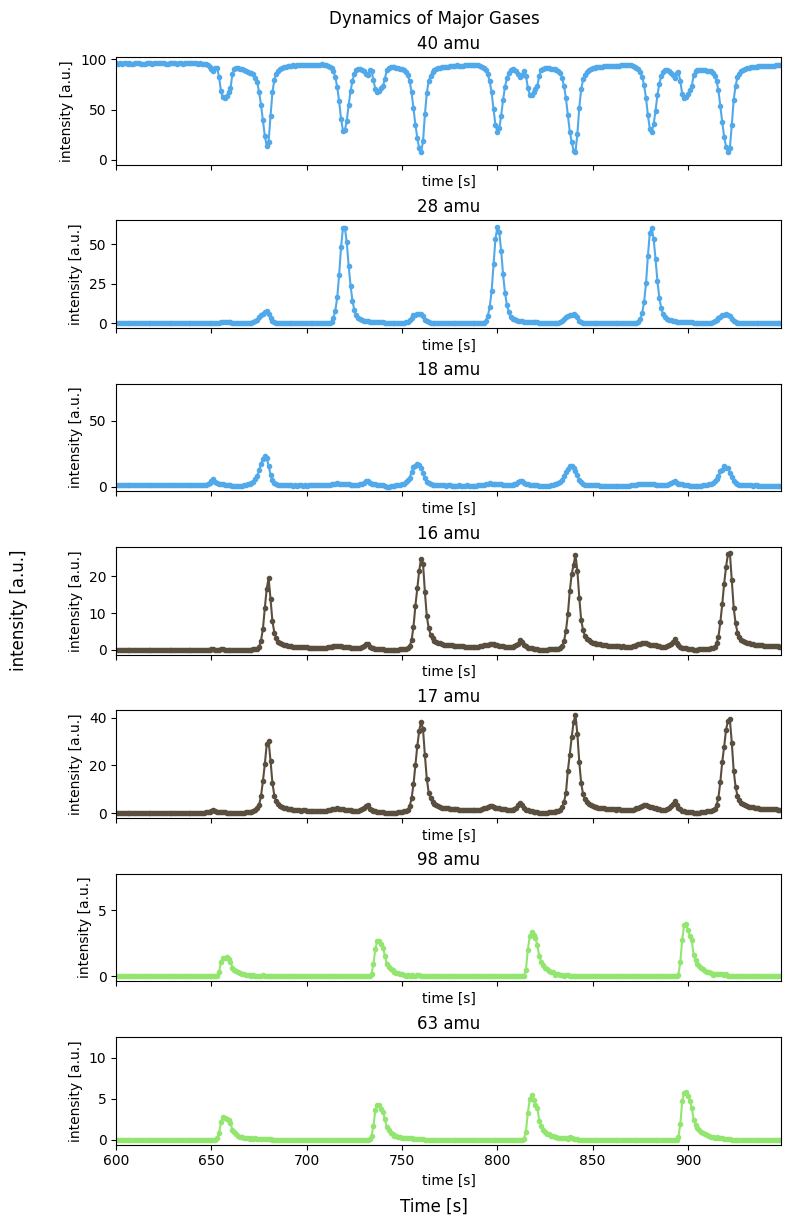

In [81]:
import itertools

category_to_plot = list(itertools.chain(*category_mass[:3]))
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,12))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    if idx not in [0, 3, 5, 7, 15, 23]:
        axs[idx].plot(df.loc[:,val],'.-',color=cate_colors[idx], label='_nolegend_')
    else:
        axs[idx].plot(df.loc[:,val],'.-',color=cate_colors[idx])
    axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle('Dynamics of Major Gases', y=1)
# fig.legend(np.arange(4,-6,-1), title='category', bbox_to_anchor=(0.95,0.982), loc='upper left')
plt.show()

fig.savefig('image/dynamics_major_percentage.png', bbox_inches='tight')

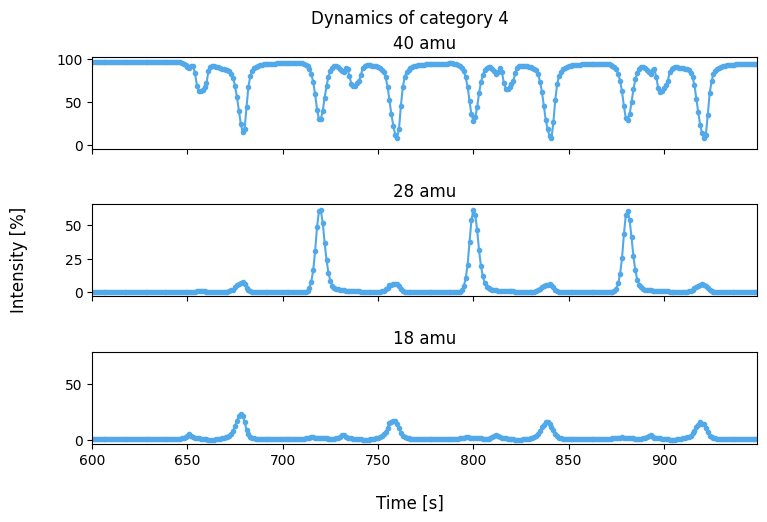

In [82]:
target_index= 0
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,5))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=cate_colors[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('Intensity [%]', x=0)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
# fig.legend(np.arange(1,-2,-1), title='category', bbox_to_anchor=(0.95,0.982), loc='upper left')
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

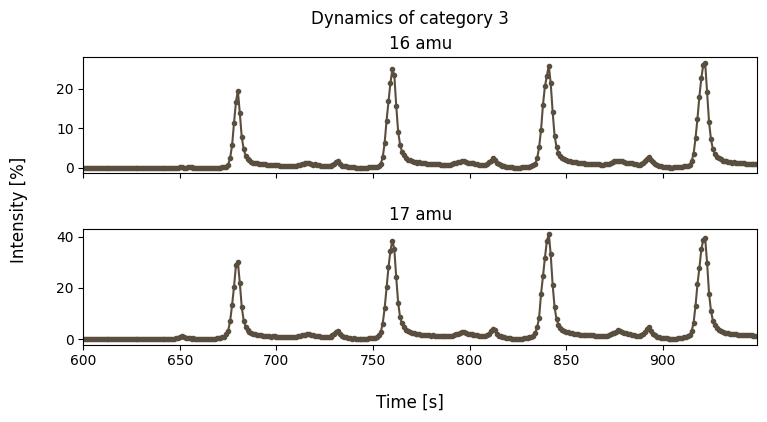

In [83]:
target_index= 1
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,4))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=color[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('Intensity [%]', x=0)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

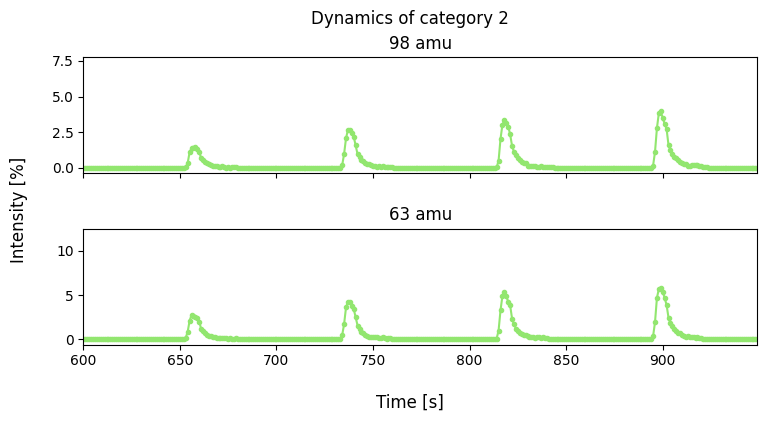

In [84]:
target_index= 2
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,4))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=color[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('Intensity [%]', x=0)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

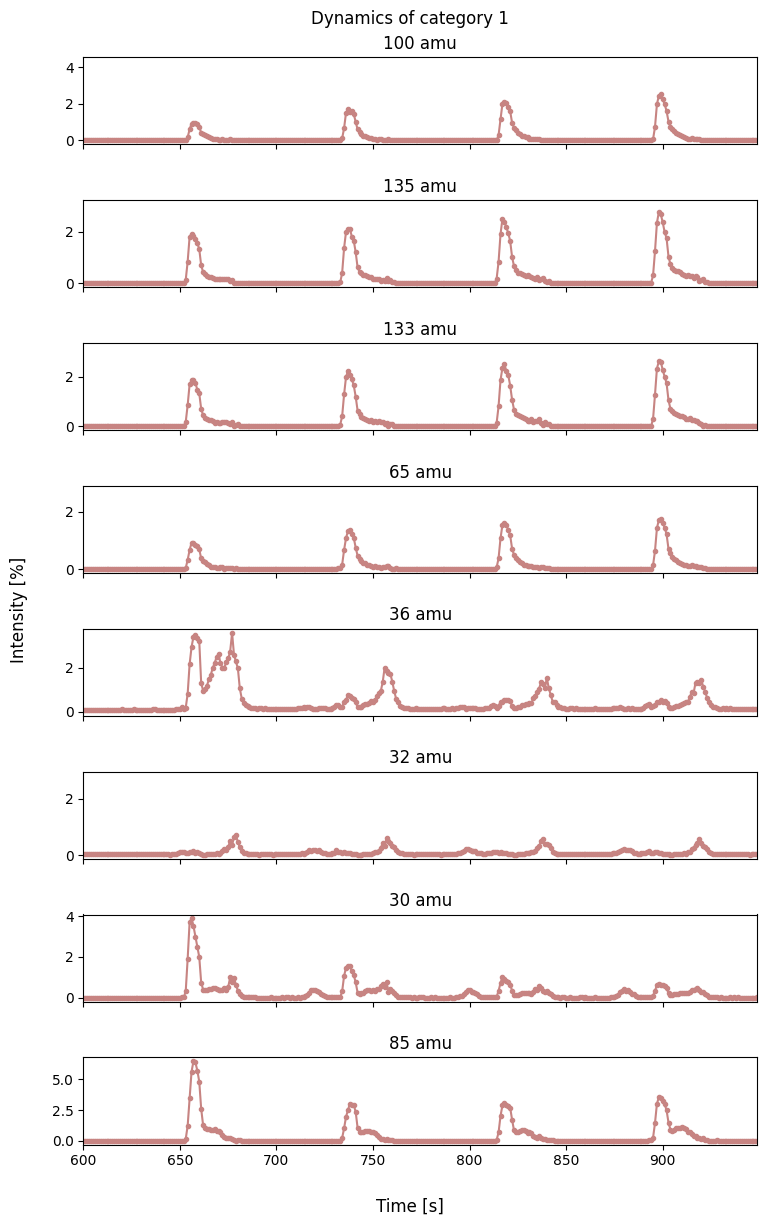

In [85]:
target_index= 3
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,12))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=color[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('Intensity [%]', x=0)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

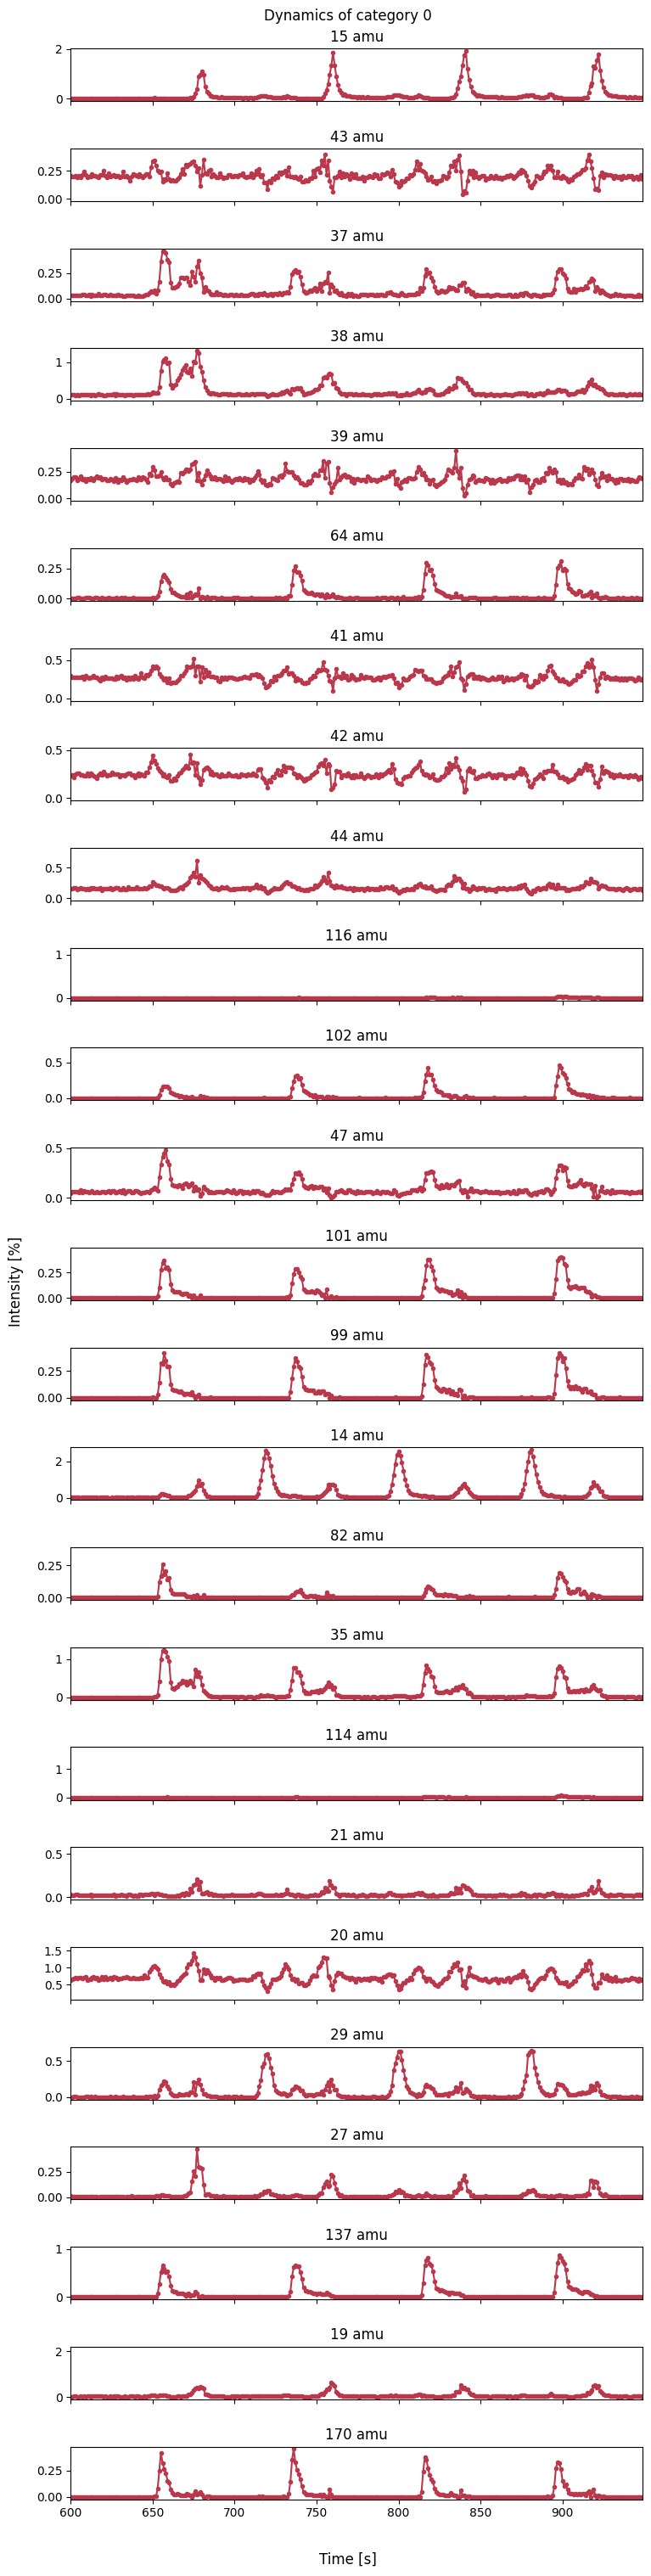

In [86]:
target_index= 4
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,30))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=color[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('Intensity [%]', x=0)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

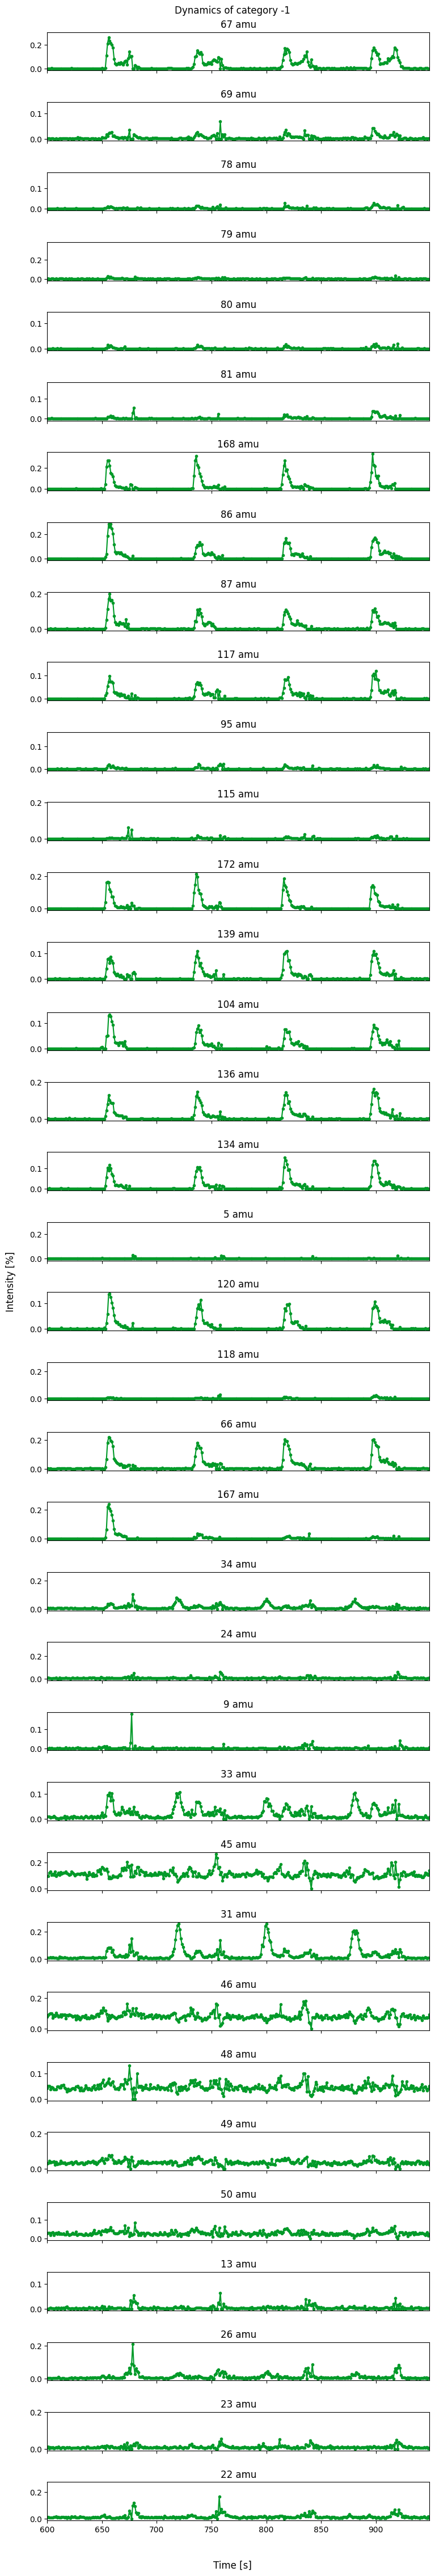

In [87]:
target_index= 5
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,45))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=color[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('Intensity [%]', x=0)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

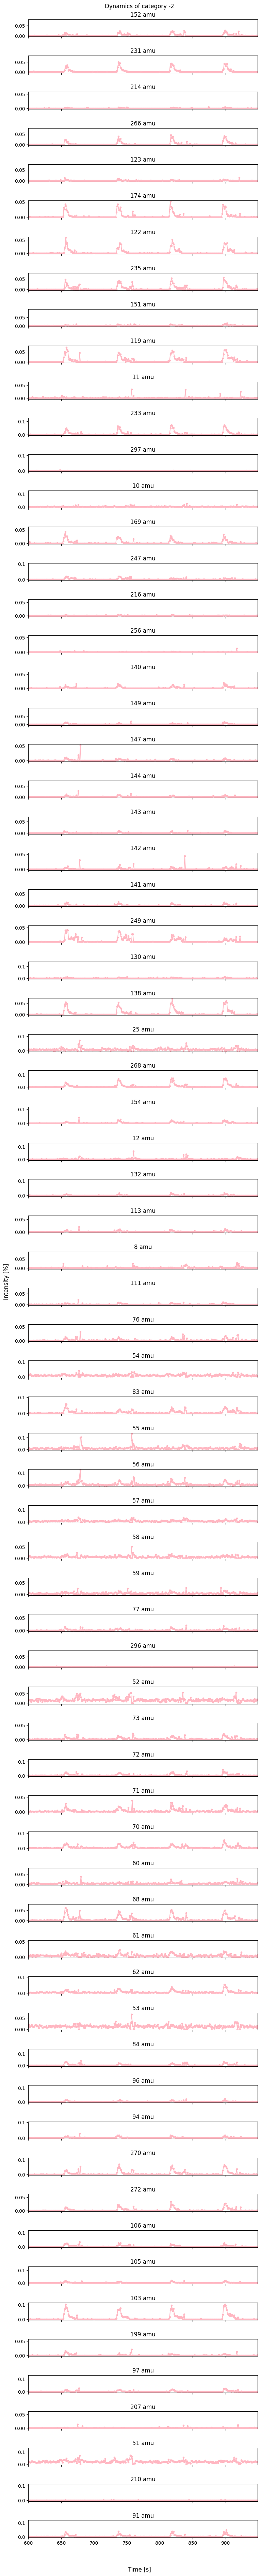

In [88]:
target_index= 6
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,75))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color='lightpink')
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('Intensity [%]', x=0)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

In [64]:
# in order to apply a clustering algorithm, group the values by category 
category_df = []
for i in category_mass:
    temp = []
    for j in i:
        temp.append((df.loc[:,j]).to_frame())
    if len(temp) >1: # concat
        category_df.append(pd.concat(temp, axis=1))
    else:
        category_df.append((df.loc[:,i]))
print(len(category_df))

# clustering <- normalize intensity first
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# scaling on each category
category_df_scaled = []
for df_elem in category_df:
    mm = MinMaxScaler()
    df_elem_scaled = mm.fit_transform(df_elem.to_numpy())
    df_elem_scaled = pd.DataFrame(df_elem_scaled, columns=df_elem.columns)
    category_df_scaled.append(df_elem_scaled)

category_df_scaled[2]

9


,98,63
0,0.000000,0.000003
1,0.000000,0.000003
2,0.000000,0.000003
3,0.000000,0.000003
4,0.000000,0.000003
...,...,...
7595,0.000044,0.000274
7596,0.000118,0.000116
7597,0.000000,0.000155
7598,0.000124,0.000226


In [65]:
# combine the dfs
scaled_df = pd.concat(category_df_scaled, axis=1)
scaled_df.head()

,40,28,18,16,17,98,63,100,135,133,...,188,273,277,278,279,280,208,282,283,258
0,0.001904,0.066295,0.963671,0.100944,0.367962,0.0,0.000003,0.0,0.0,0.0,...,0.000316,0.000626,0.002194,0.002521,0.000998,0.001172,0.003752,0.001055,0.002566,0.00446
1,0.002469,0.074697,0.959260,0.071449,0.384387,0.0,0.000003,0.0,0.0,0.0,...,0.000316,0.000626,0.002194,0.002521,0.000998,0.001172,0.003752,0.001055,0.002566,0.00446
2,0.001367,0.064695,0.949585,0.050155,0.393957,0.0,0.000003,0.0,0.0,0.0,...,0.000316,0.000626,0.002194,0.002521,0.000998,0.001172,0.003752,0.001055,0.002566,0.00446
3,0.003233,0.068179,0.948839,0.056869,0.417034,0.0,0.000003,0.0,0.0,0.0,...,0.000316,0.000626,0.002194,0.002521,0.000998,0.001172,0.003752,0.001055,0.002566,0.00446
4,0.000680,0.091547,0.917760,0.065476,0.422495,0.0,0.000003,0.0,0.0,0.0,...,0.000316,0.000626,0.002194,0.002521,0.000998,0.001172,0.003752,0.001055,0.002566,0.00446


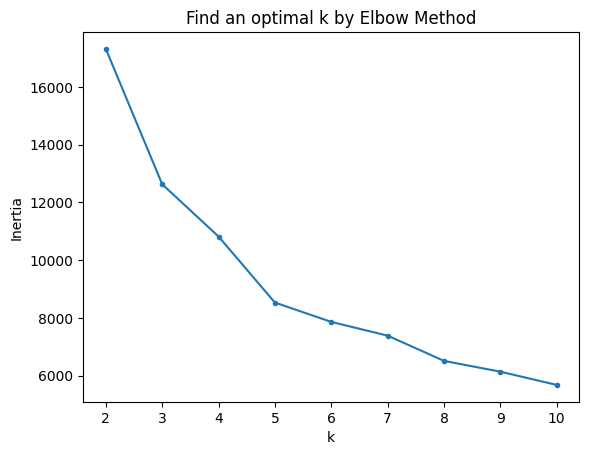

In [66]:
# find the best k for K-Means alg
inertia = []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,11),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

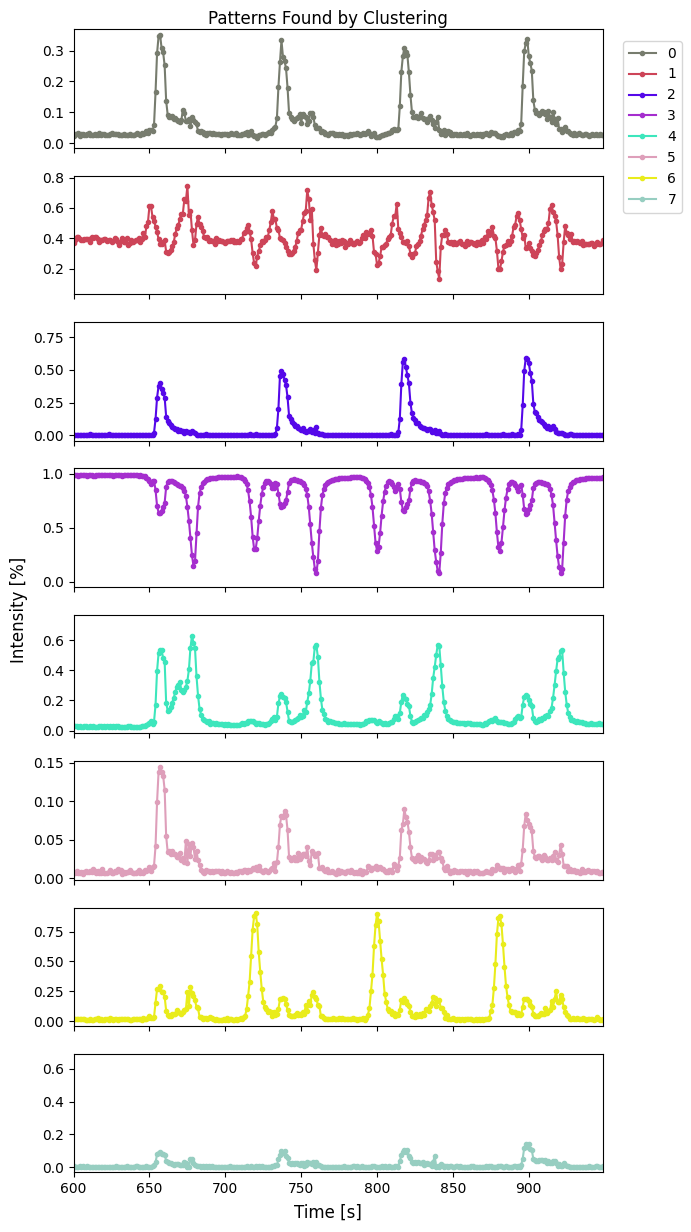

In [127]:
# set k
k = 8
km = KMeans(n_clusters=k, random_state=42)
km.fit(scaled_df.T)

label_color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(k)]

# draw cluster centers
fig, axs = plt.subplots(k,1, sharex=True, figsize=(6,12))
fig.tight_layout(pad=1)
for idx, val in enumerate(km.cluster_centers_):
    axs[idx].plot(val,'.-',color=label_color[idx])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    # axs[idx].set_title(f'{cate_label[idx]} ({val}) | category {km.labels_}') # amu
    
fig.supxlabel('Time [s]', y=-0.01)
fig.supylabel('Intensity [%]', x=-0.03)
fig.suptitle('Patterns Found by Clustering', y=1)
fig.legend(set(km.labels_), bbox_to_anchor=(0.98, 0.98), loc='upper left')
plt.show()

In [128]:
fig.savefig('image/clustering_percentage.png', bbox_inches='tight')

In [148]:
kmlabel = []
for i in range(k):
    kmlabel.append(scaled_df.T[km.labels_==i].index.values.tolist())

In [130]:
with open("file/kmlabel.txt", 'w') as output:
    for i in range(len(kmlabel)):
        for j in kmlabel[i]:
            output.write(str(j) + '\t')
        output.write(str(i) + '\n')

In [151]:
# extract the first elements
pattern_elem = []
for i in range(len(kmlabel)):
    pattern_elem.append(kmlabel[i][0])
pattern_elem

[47, 43, 98, 40, 16, 18, 28, 116]

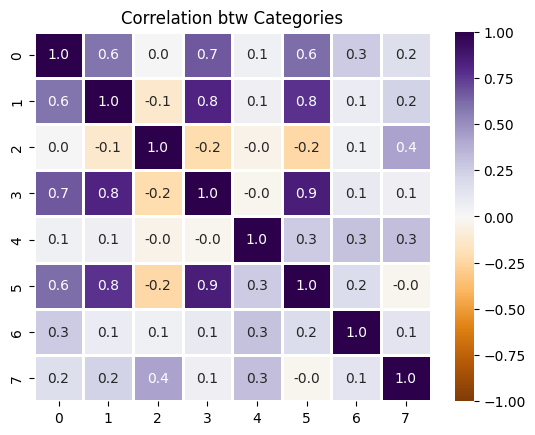

In [152]:
import itertools

# study correlation between mass = 17, 63, 40, 85, and 28, which represent each category
df_rep = df.iloc[:,pattern_elem].corr()
cust_labels = [str(i) for i in range(k)]

import seaborn as sns
fig, axs = plt.subplots()
sns.heatmap(df_rep, annot=True, linewidths=1, cmap=plt.cm.PuOr, vmin=-1, vmax=1, xticklabels=cust_labels, yticklabels=cust_labels, fmt='.1f') # annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr, vmin=-1, vmax=1
axs.set_title('Correlation btw Categories')
plt.show()

In [131]:
# table example from GeeksForGeeks
from tabulate import tabulate

# assign data
mydata = []
for i in range(len(kmlabel)):
    mydata.append(kmlabel[i][:5])

# display table
print(tabulate(mydata, headers=['Pattern','M','a','s','s',''], tablefmt="grid", showindex="always"))

+-----------+-----+-----+-----+-----+-----+
|   Pattern |   M |   a |   s |   s |     |
+===========+=====+=====+=====+=====+=====+
|         0 |  47 | 101 |  82 | 170 |  67 |
+-----------+-----+-----+-----+-----+-----+
|         1 |  43 |  39 |  41 |  42 |  44 |
+-----------+-----+-----+-----+-----+-----+
|         2 |  98 |  63 | 100 | 135 | 133 |
+-----------+-----+-----+-----+-----+-----+
|         3 |  40 |     |     |     |     |
+-----------+-----+-----+-----+-----+-----+
|         4 |  16 |  17 |  36 |  15 |  37 |
+-----------+-----+-----+-----+-----+-----+
|         5 |  18 |  32 |  30 |  85 |  21 |
+-----------+-----+-----+-----+-----+-----+
|         6 |  28 |  14 |  29 |  33 |  31 |
+-----------+-----+-----+-----+-----+-----+
|         7 | 116 | 114 |  78 |  79 |  80 |
+-----------+-----+-----+-----+-----+-----+


In [124]:
# assign data
mydata = []
for i in range(len(kmlabel)):
    mydata = [
        ['49','50','51','70'],
        ['44'],
        ['63','98'],
        ['40'],
        ['15','16','17','35','36'],
        ['18','32'],
        ['14','28'],
        ['79']
    ]

# display table
print(tabulate(mydata, headers=['Pattern','M','a','s','s',''], tablefmt="grid", showindex="always"))

+-----------+-----+-----+-----+-----+----+
|   Pattern |   M |   a |   s |   s |    |
+===========+=====+=====+=====+=====+====+
|         0 |  49 |  50 |  51 |  70 |    |
+-----------+-----+-----+-----+-----+----+
|         1 |  44 |     |     |     |    |
+-----------+-----+-----+-----+-----+----+
|         2 |  63 |  98 |     |     |    |
+-----------+-----+-----+-----+-----+----+
|         3 |  40 |     |     |     |    |
+-----------+-----+-----+-----+-----+----+
|         4 |  15 |  16 |  17 |  35 | 36 |
+-----------+-----+-----+-----+-----+----+
|         5 |  18 |  32 |     |     |    |
+-----------+-----+-----+-----+-----+----+
|         6 |  14 |  28 |     |     |    |
+-----------+-----+-----+-----+-----+----+
|         7 |  79 |     |     |     |    |
+-----------+-----+-----+-----+-----+----+


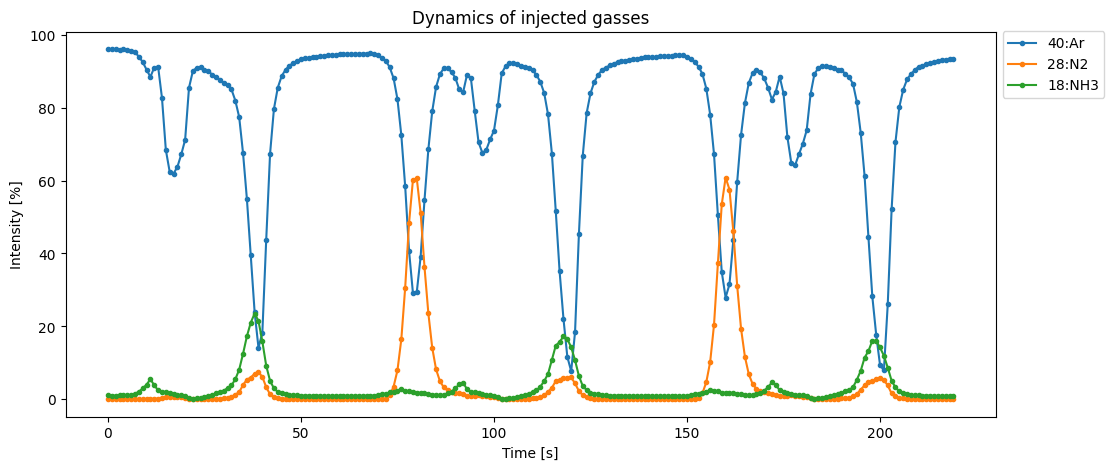

In [75]:
# one cycle
target_index= 0
category_to_plot = category_mass[target_index]
# fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,5))
# fig.tight_layout(pad=3)
plt.figure(figsize=(12,5))
for idx, val in enumerate(category_to_plot):
    plt.plot(df.loc[:,val][640:860].reset_index(drop=True),'.-')

# plt.axvspan(5, 10, color='green', alpha=0.1, lw=0) # HCDS 10s
# plt.text(5, 50, 'HCDS', fontsize = 6)
# plt.axvspan(11, 22, color='red', alpha=0.1, lw=0) # Ar 10s
# plt.text(13, 1, 'Ar purge', fontsize = 6)
# plt.axvspan(25, 42, color='blue', alpha=0.1, lw=0) # NH3 17s
# plt.text(31, 1, 'NH3', fontsize = 6)
# plt.axvspan(42, 72, color='red', alpha=0.1, lw=0) # Ar 30s
# plt.text(53, 1, 'Ar purge', fontsize = 6)
# plt.axvspan(73, 80, color='yellow', alpha=0.2, lw=0) # N2 7s
# plt.text(75, 1, 'N2', fontsize = 6)
# plt.axvspan(81, 91, color='red', alpha=0.1, lw=0) # Ar 10s
# plt.text(82, 1, 'Ar purge', fontsize = 6)

plt.xlabel('Time [s]', y=-0.005)
plt.ylabel('Intensity [%]', x=0)
plt.title(f'Dynamics of injected gasses', y=1)
plt.legend(['40:Ar', '28:N2', '18:NH3'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.show()

# fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

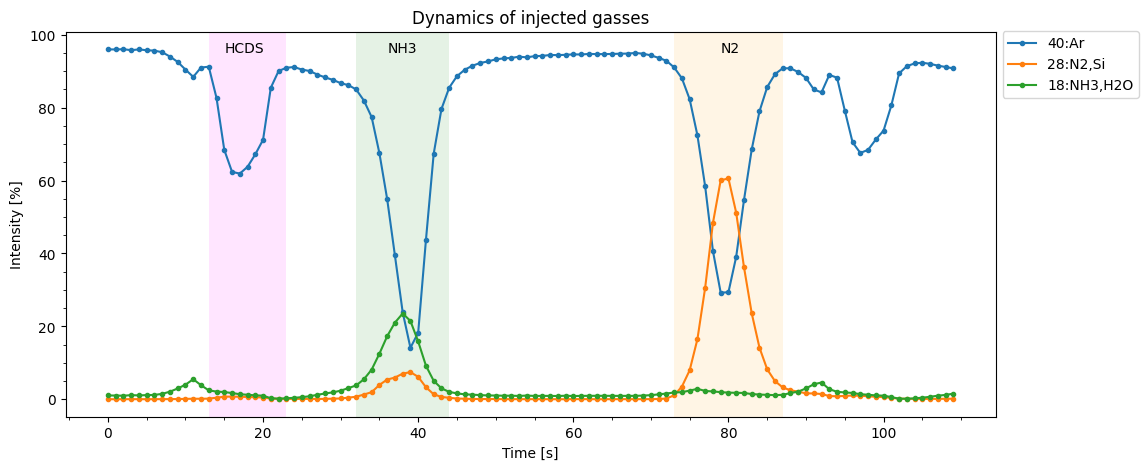

In [137]:
# one cycle
target_index= 0
category_to_plot = category_mass[target_index]
# fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,5))
# fig.tight_layout(pad=3)
plt.figure(figsize=(12,5))
for idx, val in enumerate(category_to_plot):
    plt.plot(df.loc[:,val][640:750].reset_index(drop=True),'.-')

plt.axvspan(13,23, color='magenta', alpha=0.1, lw=0) # HCDS 10s
plt.text(15, 95, 'HCDS', fontsize = 10)
plt.axvspan(32,44, color='green', alpha=0.1, lw=0) # Ar 10s
plt.text(36, 95, 'NH3', fontsize = 10)
plt.axvspan(73, 87, color='orange', alpha=0.1, lw=0) # NH3 17s
plt.text(79, 95, 'N2', fontsize = 10)
# plt.axvspan(40, 70, color='red', alpha=0.1, lw=0) # Ar 30s
# plt.text(53, 1, 'Ar purge', fontsize = 6)
# plt.axvspan(71, 78, color='yellow', alpha=0.2, lw=0) # N2 7s
# plt.text(75, 1, 'N2', fontsize = 6)
# plt.axvspan(79, 89, color='red', alpha=0.1, lw=0) # Ar 10s
# plt.text(82, 1, 'Ar purge', fontsize = 6)

plt.minorticks_on()
plt.xlabel('Time [s]', y=-0.005)
plt.ylabel('Intensity [%]', x=0)
plt.title(f'Dynamics of injected gasses', y=1)
plt.legend(['40:Ar', '28:N2,Si', '18:NH3,H2O'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.show()

# fig.savefig(f'image/percentage_cycle.png', bbox_inches='tight')